In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization import perc, SetPlotRC, ApplyFont

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# MNIST 2 Layer

In [3]:
df_results = pd.read_pickle(r"../Results/simulation_results_FeedbackAlignment_MNIST_2Layers_V1.pkl")
print(df_results.shape)
df_results.columns

(5, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [4]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.97255, 0.9797, 0.9824833333333334, 0.986566...","[0.9678, 0.9726, 0.9744, 0.9778, 0.9781, 0.980...",0.998467,0.9788
1,1,10,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.9719, 0.9800166666666666, 0.984, 0.98586666...","[0.9685, 0.9724, 0.9776, 0.978, 0.9789, 0.9781...",0.998383,0.9813
2,1,20,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.9712666666666666, 0.9800666666666666, 0.983...","[0.9688, 0.9748, 0.975, 0.9778, 0.9796, 0.9785...",0.999083,0.9810
3,1,30,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.9721666666666666, 0.978, 0.9831, 0.98578333...","[0.9693, 0.9717, 0.9752, 0.9756, 0.9775, 0.975...",0.998217,0.9783
4,1,40,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.972, 0.9782, 0.9836833333333334, 0.98665, 0...","[0.9663, 0.9724, 0.9757, 0.9769, 0.9761, 0.976...",0.998133,0.9798


In [5]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.998457,0.97984,0.000374,0.001316


In [6]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting 

1.0

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


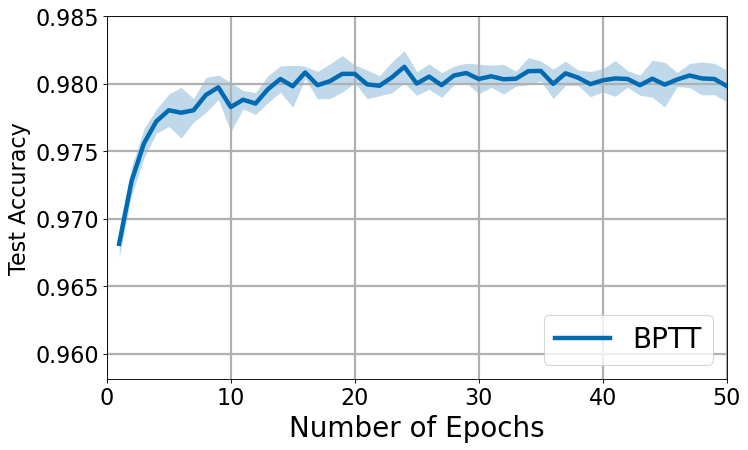

In [7]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2', label = "BPTT")
plt.fill_between(x, mean_ - std_data, mean_ + std_data, alpha=0.25, linewidth=0, color='#006BB2')

SetPlotRC()
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
# plt.title("CorInfoMax Test Accuracy on MNIST")
plt.legend(fontsize = 25, loc = "lower right")
plt.axis([0.0,50,mean_[0] - 0.01,0.985])
ApplyFont(plt.gca())

# MNIST 3 Layers

In [8]:
df_results = pd.read_pickle(r"../Results/simulation_results_FeedbackAlignment_MNIST_3Layers_V1.pkl")
print(df_results.shape)
df_results.columns

(1, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [9]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,MLP-FeedBackAlignment,"{'lr': 0.0005, 'lr_decay': 0.95, 'lr_decay_ste...","[0.9683833333333334, 0.9768166666666667, 0.982...","[0.9641, 0.9715, 0.9749, 0.9768, 0.9791, 0.980...",0.999717,0.9807


In [10]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.999717,0.9807,NaN,NaN


In [11]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting 

1.0

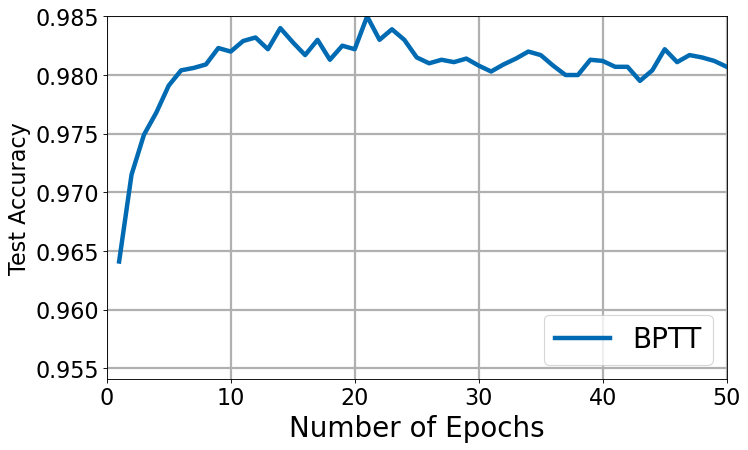

In [12]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2', label = "BPTT")
plt.fill_between(x, mean_ - std_data, mean_ + std_data, alpha=0.25, linewidth=0, color='#006BB2')

SetPlotRC()
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
# plt.title("CorInfoMax Test Accuracy on MNIST")
plt.legend(fontsize = 25, loc = "lower right")
plt.axis([0.0,50,mean_[0] - 0.01,0.985])
ApplyFont(plt.gca())

# Fashion MNIST 2 Layers

In [13]:
df_results = pd.read_pickle(r"../Results/simulation_results_FeedbackAlignment_FashionMNIST_2Layers_V1.pkl")
print(df_results.shape)
df_results.columns

(5, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [14]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.8629166666666667, 0.8765166666666667, 0.881...","[0.8492, 0.8596, 0.8659, 0.8645, 0.8634, 0.871...",0.940700,0.8869
1,1,10,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.8424, 0.8683833333333333, 0.871283333333333...","[0.8233, 0.8477, 0.8531, 0.8662, 0.8691, 0.871...",0.936500,0.8826
2,1,20,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.8592, 0.8796833333333334, 0.8793, 0.8705166...","[0.8399, 0.8613, 0.8616, 0.8539, 0.8678, 0.870...",0.927533,0.8724
3,1,30,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.85855, 0.8757166666666667, 0.88266666666666...","[0.8424, 0.8579, 0.8659, 0.8573, 0.8738, 0.871...",0.943583,0.8859
4,1,40,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.8321666666666667, 0.8768666666666667, 0.879...","[0.8201, 0.8631, 0.862, 0.8662, 0.8695, 0.8617...",0.948133,0.8882


In [15]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.93929,0.8832,0.00782,0.006383


In [16]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting 

1.0

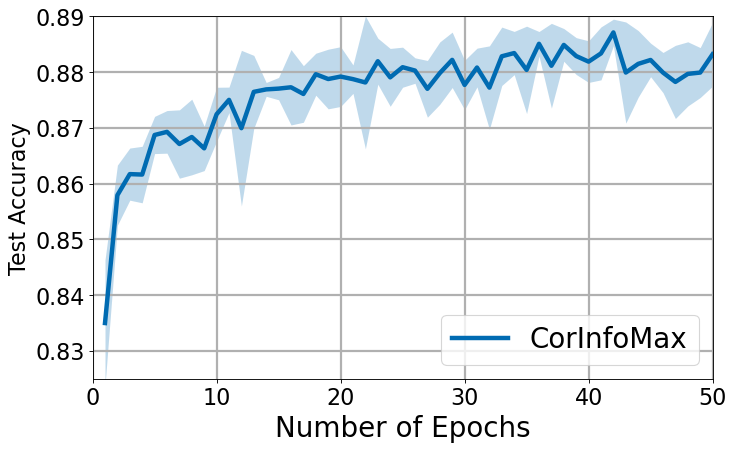

In [17]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2', label = "CorInfoMax")
plt.fill_between(x, mean_ - std_data, mean_ + std_data, alpha=0.25, linewidth=0, color='#006BB2')

SetPlotRC()
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
# plt.title("CorInfoMax Test Accuracy on MNIST")
plt.legend(fontsize = 25, loc = "lower right")
plt.axis([0.0,50,mean_[0] - 0.01,0.89])
ApplyFont(plt.gca())

# CIFAR10 2 Layers

In [18]:
df_results = pd.read_pickle(r"../Results/simulation_results_FeedbackAlignment_CIFAR10_2Layers_V1.pkl")
print(df_results.shape)
df_results.columns

(2, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [19]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.42458, 0.46846, 0.49544, 0.52844, 0.53454, ...","[0.4106, 0.4402, 0.4616, 0.4698, 0.4626, 0.478...",0.94230,0.5115
1,1,10,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.42156, 0.45806, 0.48146, 0.51222, 0.5418, 0...","[0.4048, 0.4387, 0.4434, 0.4614, 0.4755, 0.471...",0.93698,0.5084


In [20]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.93964,0.50995,0.003762,0.002192


In [21]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting 

1.0

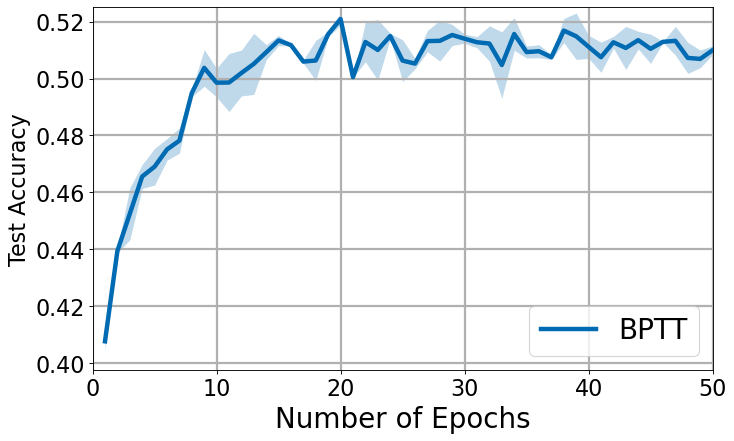

In [22]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2', label = "BPTT")
plt.fill_between(x, mean_ - std_data, mean_ + std_data, alpha=0.25, linewidth=0, color='#006BB2')

SetPlotRC()
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
# plt.title("CorInfoMax Test Accuracy on MNIST")
plt.legend(fontsize = 25, loc = "lower right")
plt.axis([0.0,50,mean_[0] - 0.01,0.525])
ApplyFont(plt.gca())

# CIFAR10 3 Layers

In [24]:
df_results = pd.read_pickle(r"../Results/simulation_results_FeedbackAlignment_CIFAR10_3Layers_V1.pkl")
print(df_results.shape)
df_results.columns

FileNotFoundError: [Errno 2] No such file or directory: '../Results/simulation_results_FeedbackAlignment_CIFAR10_3Layers_V1.pkl'

In [ ]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

In [ ]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

In [ ]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting 

In [ ]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2', label = "BPTT")
plt.fill_between(x, mean_ - std_data, mean_ + std_data, alpha=0.25, linewidth=0, color='#006BB2')

SetPlotRC()
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
# plt.title("CorInfoMax Test Accuracy on MNIST")
plt.legend(fontsize = 25, loc = "lower right")
plt.axis([0.0,50,mean_[0] - 0.01,0.525])
ApplyFont(plt.gca())

# CIFAR100 3 Layers